In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [17]:
#loading basic libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



#import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier


from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import accuracy_score as ac
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report  
from sklearn.metrics import confusion_matrix

 **PROJECT PROBLEM STATEMENT  :**
#   *TO PREDICT FOOD RATINGS FROM THE REVIEWS*

#  **DATA LOADING**

In [2]:
#reading the  training dataset 
train=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [3]:
train.shape

(13636, 15)

There are 15 columns and 13636 rows in the dataset.

In [4]:
train.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

* Total number of entries=13636
* Total number of columns=15(14 features & 1 label)
        *Label column:  Rating
        *Feature columnS:['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName',        'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'BestScore',
       'Recipe_Review']

In [5]:
#to get the information about the datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


* out of 15 columns(including target column) 5 are of object type
* 10 are of integer type

In [6]:
train['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

* the dataset is imbalanced 

#  **EXPLANATORY DATA ANALYSIS**

**BASIC INFORMATION**

In [8]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(train.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB
None

**SUMMARY STATISTICS**

In [9]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
train.describe()


Summary Statistics for Numerical Columns:


,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


**HISTOGRAMS**

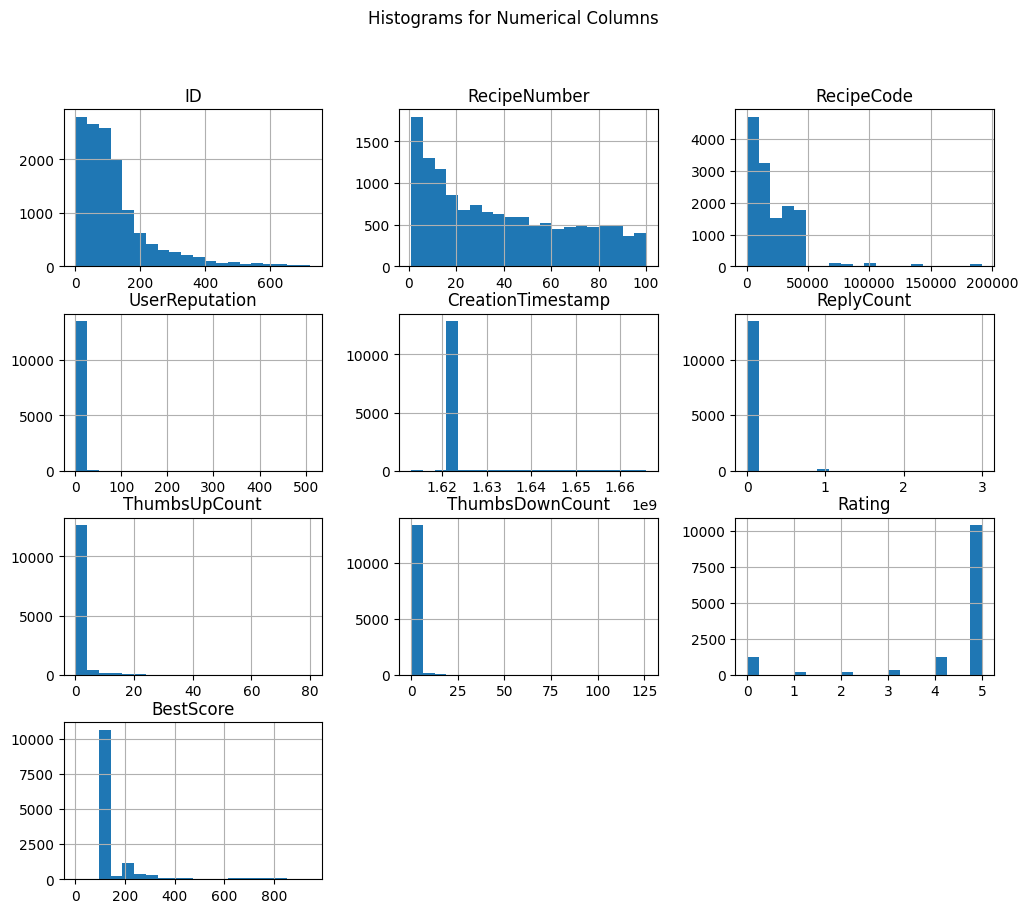

In [10]:
# Explore distributions and relationships using visualizations
# Histograms for numerical columns
train.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms for Numerical Columns')
plt.show()

**CORRELATION MATRIX HEATMAP**

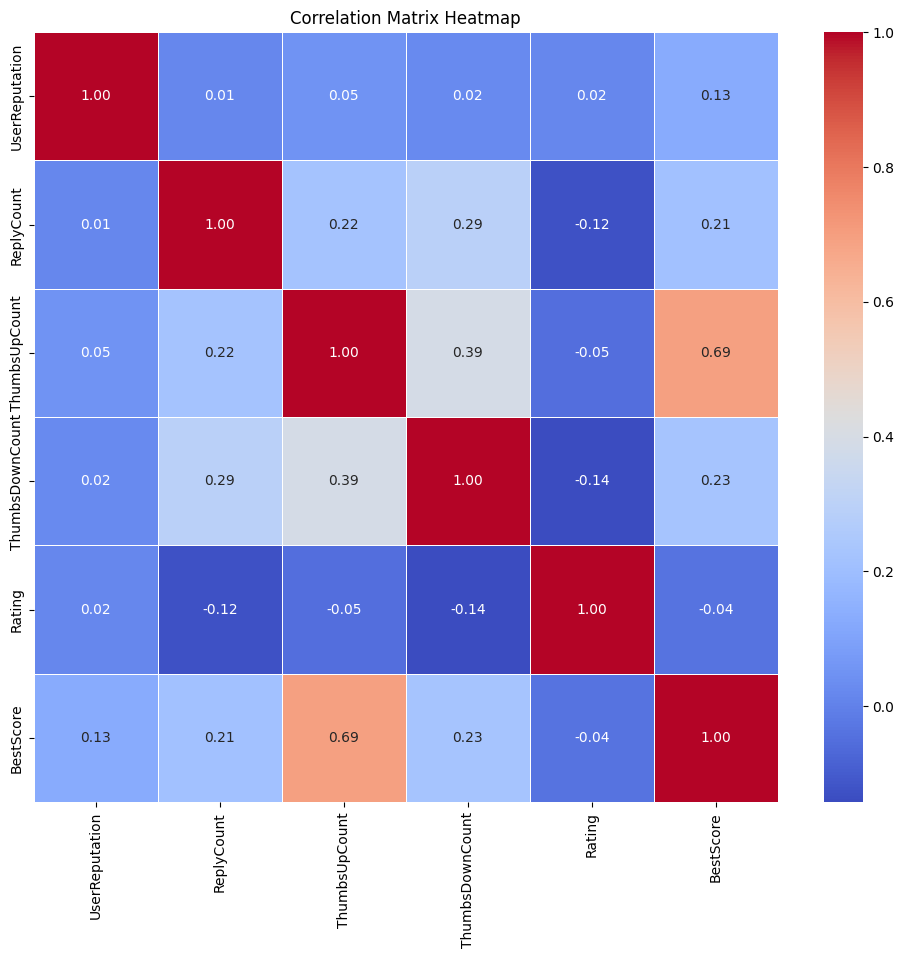

In [11]:
# Correlation matrix heatmap for numerical columns
correlation_matrix = train[['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

* THE FEATURES 'THUMBSUPCOUNT' AND 'THUMBSDOWNCOUNT' IS POSITIVELY CORRELATED WITH 'REPLYCOUNT'.

* 'USERREPUTION' IS CORRELATED WITH 'RATING'.

* 'BESTSCORE' IS ALSO POSITIVELY CORRELATED WITH 'USERREPUTATION','THUMBSUPCOUNT' AND 'THUMBSDOWNCOUNT'.

**COUNTPLOT**

In [12]:
train['Rating'].unique()

array([5, 3, 4, 0, 2, 1])

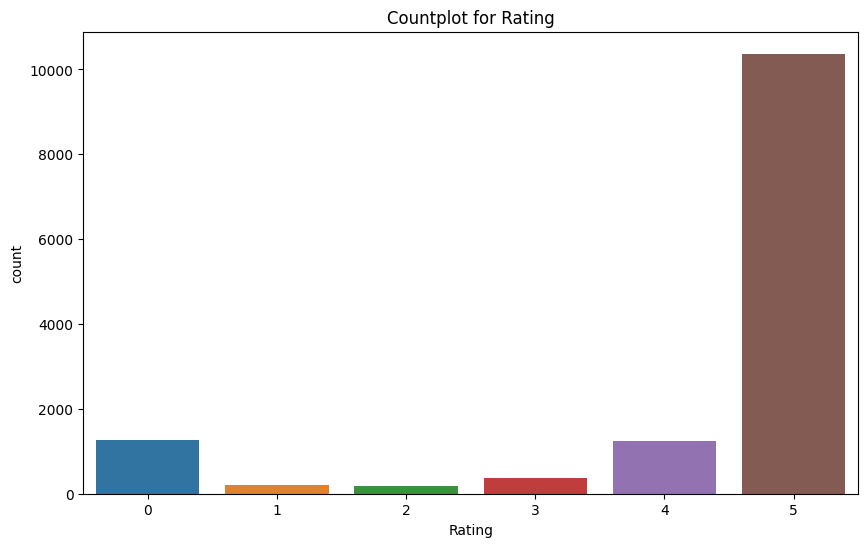

In [13]:
# Countplot for  rating
categorical_columns = [ 'Rating']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=train)
    plt.title(f'Countplot for {column}')
    plt.show()

# FEATURE ENJINEERING

In [9]:

# Convert Unix timestamp to datetime

train['CreationTimestamp'] = pd.to_datetime(train['CreationTimestamp'], unit='s')

#Extract month
train['Month'] = train['CreationTimestamp'].dt.month

# Extract year
train['Year'] = train['CreationTimestamp'].dt.year

# Extract day of the month
train['DayOfMonth'] = train['CreationTimestamp'].dt.day

# Extract hour
train['Hour'] = train['CreationTimestamp'].dt.hour



# Define a function to categorize the hour into time periods
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Breakfast'
    elif 12 <= hour < 15:
        return 'Lunch'
    elif 15 <= hour < 18:
        return 'Snack'
    elif 18 <= hour < 22:
        return 'Dinner'
    else:
        return 'Late Night'

# Apply the categorize_time function to create a new column 'TimePeriod'
train['TimePeriod'] = train['Hour'].apply(categorize_time)




In [6]:
train

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,Month,Year,DayOfMonth,Hour,TimePeriod
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,2021-06-03 10:44:38,0,0,0,5,100,great recipe! I have made them just as written...,6,2021,3,10,Breakfast
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,2021-06-03 10:57:32,0,0,1,5,100,This is an easy and quick recipe that is great...,6,2021,3,10,Breakfast
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,2021-06-03 10:49:17,0,0,0,3,100,I think I was looking for something extra spec...,6,2021,3,10,Breakfast
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,2021-06-02 15:48:19,0,0,0,5,100,This is our favorite grilled chicken recipe. ...,6,2021,2,15,Snack
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,2021-06-03 11:04:20,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...,6,2021,3,11,Breakfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,2021-06-03 10:42:49,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...,6,2021,3,10,Breakfast
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,2021-06-03 10:48:49,0,0,0,5,100,I made this pie for my family and they loved i...,6,2021,3,10,Breakfast
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,2021-06-03 11:01:29,0,0,0,5,100,Very tasty!,6,2021,3,11,Breakfast
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,2021-06-03 10:46:32,0,0,0,5,100,I have made this numerous times. It&#39;s so ...,6,2021,3,10,Breakfast


In [7]:
train.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review', 'Month', 'Year', 'DayOfMonth', 'Hour', 'TimePeriod'],
      dtype='object')

In [8]:
train['TimePeriod'].value_counts()

TimePeriod
Breakfast     12581
Snack           477
Late Night      255
Dinner          208
Lunch           115
Name: count, dtype: int64

**BAR PLOT**

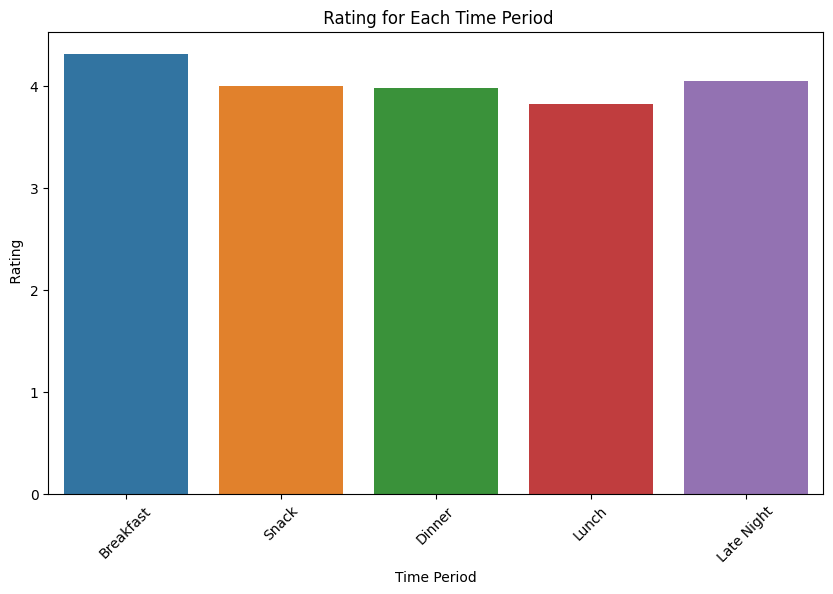

In [10]:
#bar plot of rating for each time period
plt.figure(figsize=(10, 6))
sns.barplot(x='TimePeriod', y='Rating', data=train ,errorbar=None)
plt.title(' Rating for Each Time Period')
plt.xlabel('Time Period')
plt.ylabel(' Rating')
plt.xticks(rotation=45)
plt.show()

* among all the timeperiod breakfast items are mostly rated about 4.5.
* The  least one is Lunch items(3.81) 
* the snacks and dinner were rated in 4.0 and 3.99 respct.

**COUNT PLOT**

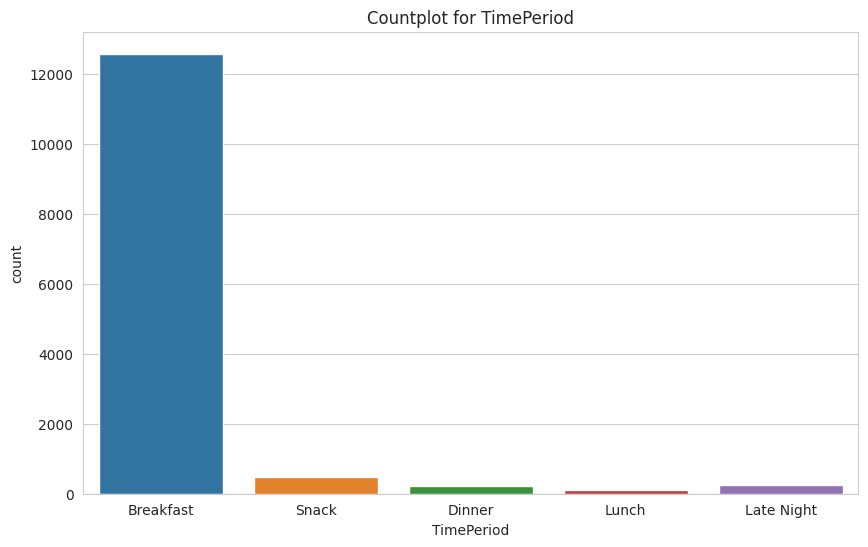

In [10]:
# Countplot for  timeperiod
categorical_columns = ['TimePeriod']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=train)
    plt.title(f'Countplot for {column}')
    plt.show()

* The Breakfast item review has the highest count with 12581 occurences.
 * However the lunch items had got the lowest reviwes about 115.

**NULL VALUE REMOVAL**

In [12]:
#showing missing values in each column 
missing_values=train.isnull().sum()
#printing the missing values
print("print the missing values in each column:")
print(missing_values)

print the missing values in each column:
ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
Month                0
Year                 0
DayOfMonth           0
Hour                 0
TimePeriod           0
dtype: int64


In [11]:
#dropping rows
t1=train.dropna()
#showing the result after dropping rows
t1.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
Month                0
Year                 0
DayOfMonth           0
Hour                 0
TimePeriod           0
dtype: int64

# **DATA SPLITTING** 

1. Drop unwanwanted columns 
2. split the dataset into train and test 

In [14]:
cols_to_dlt=['ID','CommentID','UserID','UserName','CreationTimestamp','RecipeCode','Rating']
X=t1.drop(columns=cols_to_dlt)
y=t1['Rating']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [16]:
X_train.shape,X_test.shape

((10907, 13), (2727, 13))

In [18]:
y_train.shape,y_test.shape

((10907,), (2727,))

# DATA PREPROCESSING

**SCALING AND ENCODING & extraction ** 


*   Apply minmaxscaler on numerical columns 


*   Apply OneHotEncoder  on 'Recipename','TimePeriod' columns

*   Apply  TfidfVectorizer on RecipeReview
        

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10907 entries, 7331 to 11126
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RecipeNumber     10907 non-null  int64 
 1   RecipeName       10907 non-null  object
 2   UserReputation   10907 non-null  int64 
 3   ReplyCount       10907 non-null  int64 
 4   ThumbsUpCount    10907 non-null  int64 
 5   ThumbsDownCount  10907 non-null  int64 
 6   BestScore        10907 non-null  int64 
 7   Recipe_Review    10907 non-null  object
 8   Month            10907 non-null  int32 
 9   Year             10907 non-null  int32 
 10  DayOfMonth       10907 non-null  int32 
 11  Hour             10907 non-null  int32 
 12  TimePeriod       10907 non-null  object
dtypes: int32(4), int64(6), object(3)
memory usage: 1022.5+ KB


* The new train set has only 13colums .

* 10 features are numerical and 3 are catogorical .

In [19]:
# Define numerical columns
num_cols = X.select_dtypes(include='int64').columns.tolist()

# Define preprocessing steps for each column type
num_pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

cat_pipe = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_pipe = Pipeline(steps=[
    ('tfidf', TfidfVectorizer())
])

# Combine preprocessing steps for all columns
preprocessor = ColumnTransformer([
    ('numeric', num_pipe, num_cols),
    ('categorical', cat_pipe, ['RecipeName','TimePeriod']),
    ('text', text_pipe, 'Recipe_Review')
])


# Create pipeline including feature selection
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectPercentile(chi2, percentile=50))
])

# Fit and transform the data

transformed_data = pipeline.fit_transform(X_train,y_train)

# Print the reduced feature names
reduced_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['text'].named_steps['tfidf'].get_feature_names_out()
print("Reduced Feature Names:", reduced_feature_names)

# Print the reduced TF-IDF matrix
print("Reduced TF-IDF Matrix:")
print(transformed_data.toarray())

Reduced Feature Names: ['00' '000' '03' ... 'zuchinni' 'zucs' 'zuke']
Reduced TF-IDF Matrix:
[[0.5959596  0.         0.         ... 0.         0.         0.        ]
 [0.15151515 0.         0.         ... 0.         0.         0.        ]
 [0.15151515 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.24242424 0.         0.         ... 0.         0.         0.        ]
 [0.14141414 0.         0.         ... 0.         0.         0.        ]
 [0.3030303  0.         0.         ... 0.         0.         0.        ]]


In [23]:
# Get feature names from TF-IDFVectorizer
feature_names_tfidf = preprocessor.named_transformers_['text'].get_feature_names_out()
print(feature_names_tfidf)

['00' '000' '03' ... 'zuchinni' 'zucs' 'zuke']


In [20]:
#define transformed test and train data
X_train_trans= pipeline.transform(X_train)
X_test_trans= pipeline.transform(X_test)

In [21]:
X_train_trans.shape,X_test_trans.shape

((10907, 4762), (2727, 4762))

In [26]:
y_train.shape,y_test.shape

((10907,), (2727,))

# CREATING  MODELS

Now Let's build models on the dataset

# **DUMMICLASSIFIER**

* First we build the model DummyClassifier for prediction

In [22]:
model=DummyClassifier(random_state=42).fit(X_train_trans,y_train)

model








DummyClassifier(random_state=42)

In [28]:
y_train_pred=model.predict(X_train_trans)
y_test_pred=model.predict(X_test_trans)
train_score=ac(y_train_pred,y_train)
test_score=ac(y_test_pred,y_test)
print("Train score:",train_score)
print("Test score:",test_score)

Train score: 0.759695608324929
Test score: 0.7638430509717639


# **LOGISTIC REGRESSION**

Now we use LogisticRegression Classifier for model prediction ;

Since our data is not balanced.so we have to add class weight as 'balanced' in each model to deal with class imbalance.

* cross validation to check generalisation ability of the model with 5 folds.

In [29]:
#log_reg = LogisticRegression(max_iter=1000,class_weight='balanced')
#log_reg.fit(X_train_trans,y_train)




In [30]:
# make predictions
#lr_y_train_pred=log_reg.predict(X_train_trans)
#lr_y_test_pred=log_reg.predict(X_test_trans)

#testing accuracy
#lr_train_score=ac(lr_y_train_pred,y_train)
#lr_test_score=ac(lr_y_test_pred,y_test)
#print("Train score:",lr_train_score)
#print("Test score:",lr_test_score)


In [32]:
#print(classification_report(y_test,lr_y_test_pred))
#print(ConfusionMatrixDisplay.from_predictions(y_test,lr_y_test_pred))


**CROSSVALIDATION**

In [33]:

#log_cv_train = cross_validate(log_reg,X_train_trans, y_train, cv=5)
#log_cv_train

In [34]:
#log_cv_train['test_score'].mean(),log_cv_train['test_score'].std()

* std is low so the model is consistant.varience is low.so it is not overfitted.

**HYPERPARAMETER TUNING** 

In [35]:

# DefinING the parameter grid to search
#param_grid = {
     #'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
   # 'penalty': ['l1', 'l2']  # Regularization penalty (L1 or L2)term
#}


# Initialize GridSearchCV
#lr_grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search to find the best parameters
#lr_grid.fit(X_train_trans, y_train)

# Get the best parameters and best score
#best_params = lr_grid.best_params_
#best_score = lr_grid.best_score_

# Print the best parameters and best score
#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

In [36]:
# makeing predictions
#lrgd_y_train_pred=lr_grid.predict(X_train_trans)
#lrgd_y_test_pred=lr_grid.predict(X_test_trans)

#testing accuracy
#lrgd_train_score=ac(lrgd_y_train_pred,y_train)
#lrgd_test_score=ac(lrgd_y_test_pred,y_test)
#print("Train score:",lrgd_train_score)
#print("Test score:",lrgd_test_score)

In [37]:
#lr_grid.score(X_train_trans,y_train),lr_grid.score(X_test_trans,y_test)

In [38]:
#print(classification_report(y_test,lrgd_y_test_pred))
#print(ConfusionMatrixDisplay.from_predictions(y_test,lrgd_y_test_pred))

# **SVM**

In [39]:
# # Initialize the SVM classifier
# svc = SVC(class_weight='balanced')
# svc.fit(X_train_trans,y_train)
# svc


In [40]:
# # making predictions
# svc_y_train_pred=svc.predict(X_train_trans)
# svc_y_test_pred=svc.predict(X_test_trans)

# #testing accuracy
# svc_train_score=ac(svc_y_train_pred,y_train)
# svc_test_score=ac(svc_y_test_pred,y_test)
# print("Train score:",svc_train_score)
# print("Test score:",svc_test_score)

In [41]:
# svc.score(X_train_trans,y_train),svc.score(X_test_trans,y_test)

In [42]:
# print(classification_report(y_test,svc_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,svc_y_test_pred))

**HYPERPARAMETER TUNING**

In [43]:
# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'C': [0.1, 1, 10],  # Regularization parameter
#     'kernel': ['linear', 'rbf'],  # Kernel type
#       # Kernel coefficient
# }

# # Initialize GridSearchCV
# svc_grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# # Perform grid search to find the best parameters
# svc_grid.fit(X_train_trans, y_train)

# # Get the best parameters and best score
# best_params = svc_grid.best_params_
# best_score = svc_grid.best_score_

# # Print the best parameters and best score
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

In [44]:
# # make predictions
# svcgd_y_train_pred=svc_grid.predict(X_train_trans)
# svcgd_y_test_pred=svc_grid.predict(X_test_trans)

# #testing accuracy
# svcgd_train_score=ac(svcgd_y_train_pred,y_train)
# svcngd_test_score=ac(svcgd_y_test_pred,y_test)
# #print("Train score:",svcgd_train_score)
# #print("Test score:",svcgd_test_score)

In [45]:
# svc_grid.score(X_train_trans,y_train),svc_grid.score(X_test_trans,y_test)

In [46]:
# print(classification_report(y_test,svcgd_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,svcgd_y_test_pred))

# **Bagging** 

In [47]:

# # Initialize the base estimator (Decision Tree)
# base_estimator = DecisionTreeClassifier()

# # Initialize the Bagging classifier
# dt = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# # Fit the classifier to the training data
# dt.fit(X_train_trans, y_train) 



In [48]:
# dt_y_train_pred=dt.predict(X_train_trans)
# dt_y_test_pred=dt.predict(X_test_trans)

# #testing accuracy
# dt_train_score=ac(dt_y_train_pred,y_train)
# dt_test_score=ac(dt_y_test_pred,y_test)
# print("Train score:",dt_train_score)
# print("Test score:",dt_test_score)

In [49]:
# dt.score(X_train_trans,y_train),dt.score(X_test_trans,y_test)

In [50]:
# print(classification_report(y_test,dt_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,dt_y_test_pred))

**HYPERPARAMETER TUNING** 

In [51]:
# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'base_estimator__max_depth': [None, 10, 20],  # Maximum depth of the decision tree base estimator
#     'n_estimators': [50, 100, 200],  # Number of base estimators (trees) in the bagging ensemble
#     'max_samples': [0.5, 0.7, 1.0],  # The proportion of samples to draw from X to train each base estimator
#     'max_features': [0.5, 0.7, 1.0],  # The proportion of features to draw from X to train each base estimator
# }


# # Initialize GridSearchCV
# dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit GridSearchCV to the training data
# dt_grid.fit(X_train_trans, y_train)  # Assuming X_train is your training features and y_train is your training labels

#   # Get the best parameters and best score
# best_params = dt_grid.best_params_
# best_score = dt_grid.best_score_

# # Print the best parameters and best score
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)



In [52]:
# # make predictions
# dtgd_y_train_pred=dt_grid.predict(X_train_trans)
# dtgd_y_test_pred=dt_grid.predict(X_test_trans)

# #testing accuracy
# dtgd_train_score=ac(dtgd_y_train_pred,y_train)
# dtgd_test_score=ac(dtgd_y_test_pred,y_test)
# print("Train score:",dtgd_train_score)
# print("Test score:",dtgd_test_score)

In [53]:
# dt_grid.score(X_train_trans,y_train),dt_grid.score(X_test_trans,y_test)

In [54]:
# print(classification_report(y_test,dt_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,dt_y_test_pred))

# MLP

In [ ]:
# mlp = MLPClassifier()
# mlp.fit(X_train_trans, y_train)
# mlp_y_train_pred=mlp.predict(X_train_trans)
# mlp_y_test_pred=mlp.predict(X_test_trans)

# #testing accuracy
# mlp_train_score=ac(mlp_y_train_pred,y_train)
# mlp_test_score=ac(mlp_y_test_pred,y_test)
# print("Train score:",mlp_train_score)
# print("Test score:",mlp_test_score)

In [ ]:
# print(classification_report(y_test,mlp_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,mlp_y_test_pred))

# **CART**

In [55]:
# cart = DecisionTreeClassifier()
# cart.fit(X_train_trans, y_train)

In [56]:
# cart_y_train_pred=cart.predict(X_train_trans)
# cart_y_test_pred=cart.predict(X_test_trans)

# #testing accuracy
# cart_train_score=ac(cart_y_train_pred,y_train)
# cart_test_score=ac(cart_y_test_pred,y_test)
# print("Train score:",cart_train_score)
# print("Test score:",cart_test_score)

In [57]:
# cart.score(X_train_trans,y_train),cart.score(X_test_trans,y_test)

In [58]:
# print(classification_report(y_test,cart_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,cart_y_test_pred))

**HYPERPARAMETER TUNING** 

In [59]:
# # Define the parameter grid for hyperparameter tuning for CART
# param_grid_cart = {
#      'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#      'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
#      'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
#  }



#  # Initialize GridSearchCV for CART
# cart_grid = GridSearchCV(estimator=cart, param_grid=param_grid_cart, cv=5, scoring='accuracy')

#  # Fit GridSearchCV to the training data
# cart_grid.fit(X_train_trans, y_train)

#  # Get the best parameters and best score for CART
# best_params_cart = cart_grid.best_params_
# best_score_cart = cart_grid.best_score_

# print("Best Parameters for CART:", best_params_cart)
# print("Best Score for CART:", best_score_cart)

In [60]:
# #make predictions
# cartgd_y_train_pred=cart_grid.predict(X_train_trans)
# cartgd_y_test_pred=cart_grid.predict(X_test_trans)

# #testing accuracy
# cartgd_train_score=ac(cartgd_y_train_pred,y_train)
# cartgd_test_score=ac(cartgd_y_test_pred,y_test)
# print("Train score:",cartgd_train_score)
# print("Test score:",cartgd_test_score)

In [61]:
# cart_grid.score(X_train_trans,y_train),cart_grid.score(X_test_trans,y_test)

In [62]:
# print(classification_report(y_test,cartgd_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,cartgd_y_test_pred))

In [69]:
#  boosting_gd.score(X_train_trans,y_train),boosting_gd.score(X_test_trans,y_test)

# **RANDOM FOREST**

In [75]:
# # Initialize the RandomForest classifier
# rf =RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train_trans,y_train)
# rf


RandomForestClassifier(random_state=42)

In [76]:
# # making predictions
# rf_y_train_pred=rf.predict(X_train_trans)
# rf_y_test_pred=rf.predict(X_test_trans)

# #testing accuracy
# rf_train_score=ac(rf_y_train_pred,y_train)
# rf_test_score=ac(rf_y_test_pred,y_test)
# print("Train score:",rf_train_score)
# print("Test score:",rf_test_score)

Train score: 0.9996332630420831
Test score: 0.7719105243857719


In [23]:
# print(classification_report(y_test,rf_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,rf_y_test_pred))

**HYPERPARAMETER TUNING**

In [113]:
#  #Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of trees
#     'max_depth': [None, 10, 20],  # Maximum depth of trees
#     'min_samples_split': [2, 5, 10] 
# }# Minimum number of samples required to split a node
   
    

# # Initialize GridSearchCV
# rf_grid= GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')


# # Perform grid search to find the best parameters
#  rf_grid.fit(X_train_trans, y_train)

#  # Get the best parameters and best score
#  best_params = rf_grid.best_params_
#  best_score = rf_grid.best_score_

#  # Print the best parameters and best score
#  print("Best Parameters:", best_params)
#  print("Best Score:", best_score)

In [80]:
# # make predictions
# rfgd_y_train_pred=rf_grid.predict(X_train_trans)
# rfgd_y_test_pred=rf_grid.predict(X_test_trans)

# #testing accuracy
# rfgd_train_score=ac(rfgd_y_train_pred,y_train)
# rfgd_test_score=ac(rfgd_y_test_pred,y_test)
# print("Train score:",rfgd_train_score)
# print("Test score:",rfgd_test_score)

In [82]:
# print(classification_report(y_test,rfgd_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,rfgd_y_test_pred))

# **KNN CLASSIFIER**

In [24]:
# Initialize the KNN classifier
knn= KNeighborsClassifier()
knn.fit(X_train_trans,y_train)
knn

KNeighborsClassifier()

In [25]:
#making predictions
knn_y_train_pred=knn.predict(X_train_trans)
knn_y_test_pred=knn.predict(X_test_trans)

#testing accuracy
knn_train_score=ac(knn_y_train_pred,y_train)
knn_test_score=ac(knn_y_test_pred,y_test)
print("Train score:",knn_train_score)
print("Test score:",knn_test_score)

Train score: 0.7723480333730631
Test score: 0.7609094242757609


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.31      0.03      0.06       266
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        67
           4       0.29      0.01      0.02       238
           5       0.77      0.99      0.86      2083

    accuracy                           0.76      2727
   macro avg       0.23      0.17      0.16      2727
weighted avg       0.64      0.76      0.67      2727



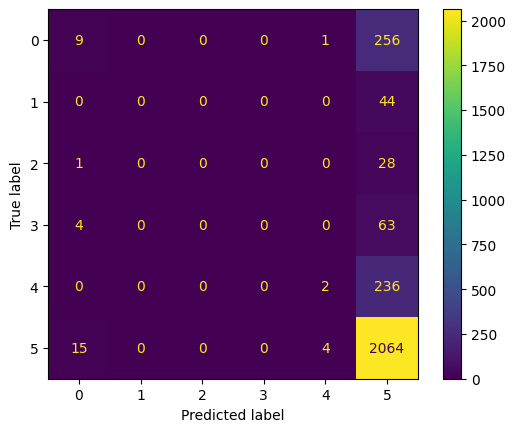

In [26]:
print(classification_report(y_test,knn_y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,knn_y_test_pred))

**HYPERPARAMETER TUNING**

In [109]:
# #Define the parameter grid to search
# param_grid = {
#               'n_neighbors': [3, 5, 7],  # Inverse of regularization strength
#               'weights': ['uniform', 'distance'], # Weighting function
               
#                }


# #Initialize GridSearchCV
# knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# #Perform grid search to find the best parameters
# knn_grid.fit(X_train_trans, y_train)

# #Get the best parameters and best score
# best_params = knn_grid.best_params_
# best_score = knn_grid.best_score_

# #Print the best parameters and best score
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.7622625365049627


In [110]:
# # make predictions
# knngd_y_train_pred=knn_grid.predict(X_train_trans)
# knngd_y_test_pred=knn_grid.predict(X_test_trans)

# # testing accuracy
# knngd_train_score=ac(knngd_y_train_pred,y_train)
# knngd_test_score=ac(knngd_y_test_pred,y_test)
# print("Train score:",knngd_train_score)
# print("Test score:",knngd_test_score)

Train score: 0.9996332630420831
Test score: 0.7583425009167584


              precision    recall  f1-score   support

           0       0.47      0.12      0.19       266
           1       0.27      0.07      0.11        44
           2       0.33      0.10      0.16        29
           3       0.23      0.04      0.07        67
           4       0.24      0.05      0.09       238
           5       0.78      0.97      0.87      2083

    accuracy                           0.76      2727
   macro avg       0.39      0.23      0.25      2727
weighted avg       0.68      0.76      0.69      2727



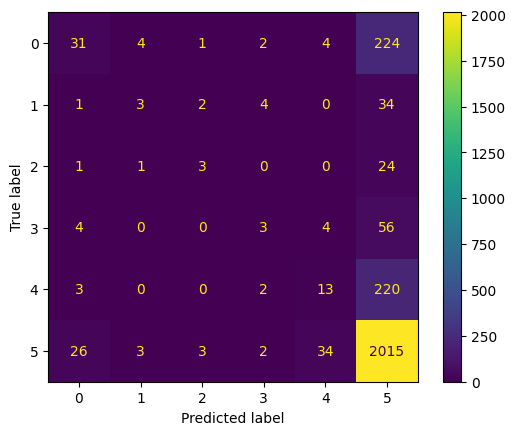

In [111]:
# print(classification_report(y_test,knngd_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,knngd_y_test_pred))

# **RIDGE CLASSIFIER**

In [28]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score as ac 

# Initialize the Ridge Classifier
ridge_classifier = RidgeClassifier()

# Fit the classifier to the training data
ridge_classifier.fit(X_train_trans, y_train)

RidgeClassifier()

In [30]:
#make predictions
rg_y_train_pred=ridge_classifier.predict(X_train_trans)
rg_y_test_pred=ridge_classifier.predict(X_test_trans)

#testing accuracy
rg_train_score=ac(rg_y_train_pred,y_train)
rg_test_score=ac(rg_y_test_pred,y_test)
print("Train score:",rg_train_score)
print("Test score:",rg_test_score)

Train score: 0.8462455303933254
Test score: 0.7774110744407774


              precision    recall  f1-score   support

           0       0.51      0.14      0.22       266
           1       0.58      0.16      0.25        44
           2       0.00      0.00      0.00        29
           3       0.43      0.13      0.20        67
           4       0.27      0.06      0.10       238
           5       0.80      0.99      0.88      2083

    accuracy                           0.78      2727
   macro avg       0.43      0.25      0.28      2727
weighted avg       0.70      0.78      0.71      2727



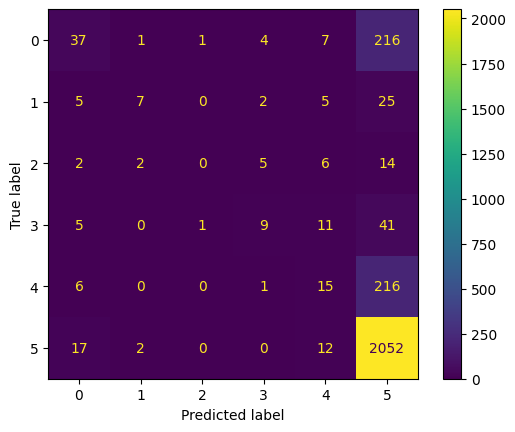

In [31]:
 print(classification_report(y_test,rg_y_test_pred))
 print(ConfusionMatrixDisplay.from_predictions(y_test,rg_y_test_pred))

**HYPER PARAMETER TUNING**

In [94]:
# # Define the hyperparameters grid to search
# param_grid = {
#     'alpha': [0.1, 0.5, 1.0],  # Example values for alpha, adjust as needed
#     'solver': ['auto'],  # Example solvers
#   # Example solvers
#     'fit_intercept': [True, False],
#     'random_state': [42, 101]}

# # Initialize GridSearchCV
# ridge_gd= GridSearchCV(estimator=ridge_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
# # Fit GridSearchCV to the training data
# ridge_gd.fit(X_train_trans, y_train)

# # Get the best parameters and best score for AdaBoost
# best_params_ridge = ridge_gd.best_params_
# best_score_ridge = ridge_gd.best_score_

# print("Best Parameters for Boosting (AdaBoost):", best_params_ridge)
# print("Best Score for Boosting (AdaBoost):", best_score_ridge)



Best Parameters for Boosting (AdaBoost): {'alpha': 1.0, 'fit_intercept': False, 'random_state': 42, 'solver': 'auto'}
Best Score for Boosting (AdaBoost): 0.7734484681679247


In [95]:
# rgd_y_train_pred=ridge_gd.predict(X_train_trans)
# rgd_y_test_pred=ridge_gd.predict(X_test_trans)

# #testing accuracy
# rgd_train_score=ac(rgd_y_train_pred,y_train)
# rgd_test_score=ac(rgd_y_test_pred,y_test)
# print("Train score:",rgd_train_score)
# print("Test score:",rgd_test_score)

Train score: 0.857064270651875
Test score: 0.7766776677667767


              precision    recall  f1-score   support

           0       0.49      0.14      0.22       266
           1       0.64      0.20      0.31        44
           2       0.00      0.00      0.00        29
           3       0.45      0.13      0.21        67
           4       0.28      0.07      0.11       238
           5       0.80      0.98      0.88      2083

    accuracy                           0.78      2727
   macro avg       0.44      0.26      0.29      2727
weighted avg       0.71      0.78      0.72      2727



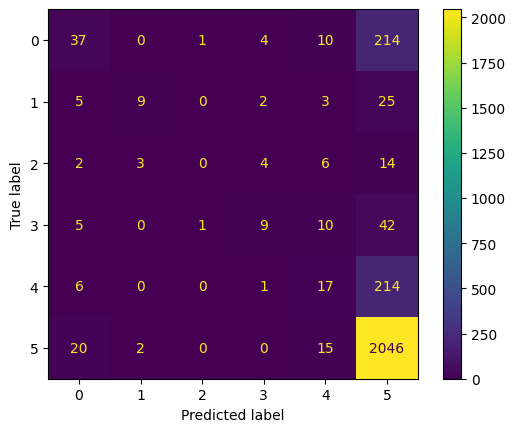

In [108]:
# print(classification_report(y_test,rgd_y_test_pred))
# print(ConfusionMatrixDisplay.from_predictions(y_test,rgd_y_test_pred))

# XGBOOST

In [32]:
# Initialize XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train_trans,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [34]:
#make predictions
xgb_y_train_pred=xgb.predict(X_train_trans)
xgb_y_test_pred=xgb.predict(X_test_trans)

#testing accuracy
xgb_train_score=ac(xgb_y_train_pred,y_train)
xgb_test_score=ac(xgb_y_test_pred,y_test)
print("Train score:",xgb_train_score)
print("Test score:",xgb_test_score)

Train score: 0.9272943980929678
Test score: 0.7807114044737807


              precision    recall  f1-score   support

           0       0.50      0.13      0.20       266
           1       0.68      0.34      0.45        44
           2       0.45      0.17      0.25        29
           3       0.50      0.19      0.28        67
           4       0.39      0.10      0.15       238
           5       0.80      0.98      0.88      2083

    accuracy                           0.78      2727
   macro avg       0.55      0.32      0.37      2727
weighted avg       0.72      0.78      0.72      2727



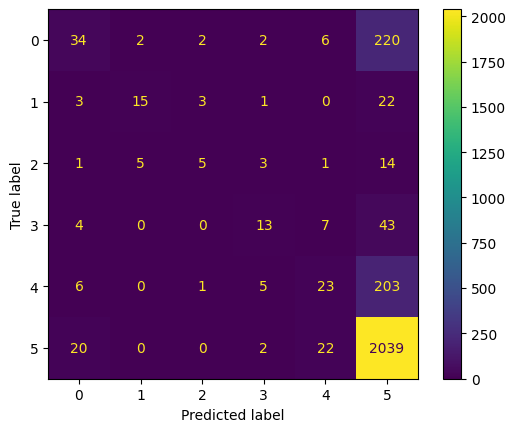

In [35]:
print(classification_report(y_test,xgb_y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,xgb_y_test_pred))

In [61]:
# # Define a grid of hyperparameters
# param_grid = {
#     'max_depth': [3, 5],
#     'learning_rate': [0.01, 0.1, 0.3]
# }
# # Initialize GridSearchCV with the classifier and parameter grid
# xggrid= GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# # Fit the grid search to the training data
# xggrid.fit(X_train_trans, y_train)

# # Get the best parameters and best score
# best_params = xggrid.best_params_
# best_score = xggrid.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 5}
Best Score: 0.7739986149004631


In [39]:
#make predictions
xggrid_y_train_pred=xggrid.predict(X_train_trans)
xggrid_y_test_pred=xggrid.predict(X_test_trans)

#testing accuracy
xggrid_train_score=ac(xggrid_y_train_pred,y_train)
xggrid_test_score=ac(xggrid_y_test_pred,y_test)
print("Train score:",xggrid_train_score)
print("Test score:",xggrid_test_score)

In [41]:
print(classification_report(y_test,xggrid_y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,xggrid_y_test_pred))

# **ACCURACY OF BEST 3  MODELS**

XGBOOST

* TRAIN ACCURACY  :0.927
  TEST ACCURACY   :0.780
  
  
RIDGE CLASSIFIER

* TRAIN ACCURACY  :0.846
  TEST ACCURACY   :0.777
  
KNN CLASSIFIER
 
* TRAIN ACCURACY  :0.772
  TEST ACCURACY   :0.760




**BAR PLOT**

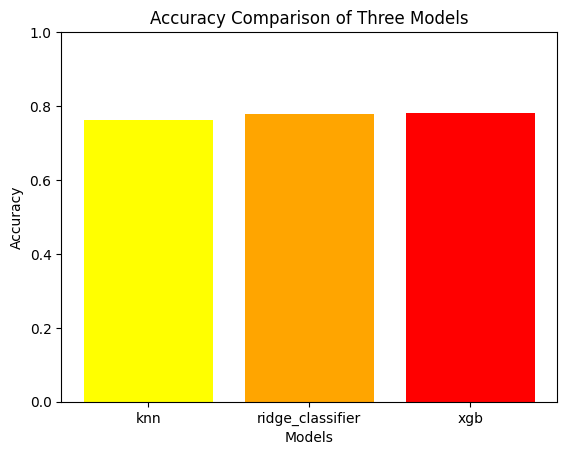

In [42]:

# Accuracy values for three models
accuracies = [knn_test_score,rg_test_score,  xgb_test_score]
models = [ 'knn','ridge_classifier','xgb']

# Create bar plot
plt.bar(models, accuracies, color=['yellow', 'orange', 'red'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Three Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy

# Show plot
plt.show()

**THE ENSEMBLE MODEL XGBOOST CLASSIFIER HAS  THE HIGHEST ACCURACY AMONG ALL MODELS .SO XGBOOST CLASSIFIER IS THE BEST MODEL TO FIT.**

**FITTING MODEL TO THE ENTIRE TRAIN DATA**

In [44]:
X_t=pipeline.transform(X)

In [62]:
# Initialize the Ridge Classifier
XGBOOST= XGBClassifier(learning_rate=0.3,max_depth=5)

# Fit the classifier to the training data
XGBOOST.fit(X_t, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [64]:
  XGBOOST.score(X_t,y)

0.8909344286342966

# TEST DATA

In [47]:
#loading the test dataset
test=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [52]:
test.shape

(4546, 19)

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 4546 non-null   int64         
 1   RecipeNumber       4546 non-null   int64         
 2   RecipeCode         4546 non-null   int64         
 3   RecipeName         4546 non-null   object        
 4   CommentID          4546 non-null   object        
 5   UserID             4546 non-null   object        
 6   UserName           4546 non-null   object        
 7   UserReputation     4546 non-null   int64         
 8   CreationTimestamp  4546 non-null   datetime64[ns]
 9   ReplyCount         4546 non-null   int64         
 10  ThumbsUpCount      4546 non-null   int64         
 11  ThumbsDownCount    4546 non-null   int64         
 12  BestScore          4546 non-null   int64         
 13  Recipe_Review      4546 non-null   object        
 14  Month   

* out of 14 columns 9 columns are of integer type and 5 are of object type.

In [50]:
test.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
Month                0
Year                 0
DayOfMonth           0
Hour                 0
TimePeriod           0
dtype: int64

* there is no null values on the test dataset

In [53]:
test['CreationTimestamp'] = pd.to_datetime(test['CreationTimestamp'], unit='s')
# Extract month
test['Month'] = test['CreationTimestamp'].dt.month

# Extract year
test['Year'] = test['CreationTimestamp'].dt.year

# Extract day of the month
test['DayOfMonth'] = test['CreationTimestamp'].dt.day

# Extract hour
test['Hour'] = test['CreationTimestamp'].dt.hour



# Define a function to categorize the hour into time periods
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Breakfast'
    elif 12 <= hour < 15:
        return 'Lunch'
    elif 15 <= hour < 18:
        return 'Snack'
    elif 18 <= hour < 22:
        return 'Dinner'
    else:
        return 'Late Night'

# Apply the categorize_time function to create a new column 'TimePeriod'
test['TimePeriod'] = test['Hour'].apply(categorize_time)

In [54]:
test

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,Month,Year,DayOfMonth,Hour,TimePeriod
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,2021-06-03 11:00:43,0,0,0,100,This was so good!! The pumpkin was perfect as...,6,2021,3,11,Breakfast
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,2021-06-03 10:54:45,0,0,1,100,"So good! Could not stop eating them, so bad....",6,2021,3,10,Breakfast
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,2021-06-03 11:05:07,0,0,0,100,I use a small ladle to fill muffin cups.,6,2021,3,11,Breakfast
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,2021-06-02 15:47:52,0,4,3,212,I made this and followed the instructions as d...,6,2021,2,15,Snack
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,2021-06-03 11:07:40,0,0,1,100,Very Good! I used corn tortillas. Used fresh...,6,2021,3,11,Breakfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,152,32,17310,Seafood Lasagna,sp_aUSaElGf_17310_c_310012,u_1oKYP0QIv00q3K9Z5U0TosT5gYx,jsantullo,1,2021-06-03 10:58:19,0,0,0,100,This is an absolutely wonderful seafood recipe...,6,2021,3,10,Breakfast
4542,121,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_331905,u_1oKVlhuSfIH4M8gwWLvmkvs3215,homeoftaste,1,2021-06-03 10:59:50,0,0,0,100,This us a definite &#34;OMG&#34;. Tastes sinf...,6,2021,3,10,Breakfast
4543,133,73,41095,Contest-Winning New England Clam Chowder,sp_aUSaElGf_41095_c_112060,u_1oKVb3oC9QR5uDI8OqeaPncMtBe,cmfisher,1,2021-06-03 10:41:43,0,0,0,100,absolutely great....even husband and grandson ...,6,2021,3,10,Breakfast
4544,91,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_391682,u_1oKcs7T7xAY63ZrRKCwH8ccshww,danalu8,1,2021-06-03 11:04:49,0,0,1,100,I followed directions. It tastes very bland. V...,6,2021,3,11,Breakfast


In [73]:
transformed_test = pipeline.transform(test)

**we  predict the food ratings by  the best model "XGBOOST CLASSIFIER" with real test data**

In [74]:
y_pred=XGBOOST.predict(transformed_test)
submission=pd.DataFrame({"ID":range(1,4547),
                           "Rating":y_pred})
submission.to_csv('submission.csv',index=False)